# Testing scib metrics on cancer seacells integration with scvi implementation of scib

In [1]:
import scanpy as sc
import pandas as pd
import scvi
from scib_metrics.benchmark import Benchmarker

Global seed set to 0


In [2]:
initDir = '/group/testa/Project/OvarianAtlas/atlas_project/raw_data/integration/metacells/cancer/'

In [3]:
adata_list={'seacells_hdg_patients_batch_corr_scgen_tissuetreat_embeddings_2500.h5ad':'scGen_HVG',
            'seacells_hdg_patients_batch_corr_scgen_tissuetreat_embeddings_HDG.h5ad':'scGen_HDG',
            'seacells_hdg_patients_batch_corr_scVI_tissuetreat_embeddings_2500.h5ad':'scVI_HVG',
            'seacells_hdg_patients_batch_corr_scANVI_tissuetreat_embeddings_2500.h5ad':'scANVI_HVG',
            'seacells_hdg_patients_batch_corr_scVI_tissuetreat_embeddings_HDG.h5ad':'scVI_HDG',
            'seacells_hdg_patients_batch_corr_scANVI_tissuetreat_embeddings_HDG.h5ad':'scANVI_HDG'}

In [4]:
# Load the first AnnData object to store all embeddings
first_file = list(adata_list.keys())[0]
adata_first = sc.read(initDir + first_file)

In [5]:
# Function to get the correct embedding key based on the filename
def get_embedding_key(filename):
    if 'scgen' in filename.lower():
        return 'corrected_latent'
    elif 'scvi' in filename.lower():
        return 'X_scVI'
    elif 'scanvi' in filename.lower():
        return 'X_scANVI'
    else:
        raise ValueError(f"Unknown embedding type for file: {filename}")

In [6]:
# Iterate over each file, load the AnnData object, and extract the embeddings
for file, label in adata_list.items():
    adata = sc.read_h5ad(initDir + file)
    embedding_key = get_embedding_key(file)
    embeddings = adata.obsm[embedding_key]
    adata_first.obsm[label] = embeddings

In [7]:
adata_first

AnnData object with n_obs × n_vars = 9054 × 2500
    obs: 'tissue', 'developmental_stage', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'dataset', 'SEACell', '# Single Cells', 'tissue-treatment', '_scvi_batch', '_scvi_labels', 'concat_batch', 'S_score', 'G2M_score', 'phase'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'dataset_colors', 'neighbors', 'paper_ID_colors', 'pca', 'phase_colors', 'tissue-treatment_colors', 'tissue_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'corrected_latent', 'latent', 'scGen_HVG', 'scGen_HDG', 'scVI_HVG', 'scANVI_HVG', 'scVI_HDG', 'scANVI_HDG'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [8]:
bm = Benchmarker(
    adata_first,
    batch_key="paper_ID",
    label_key="tissue-treatment",
    embedding_obsm_keys = ['scGen_HVG', 'scGen_HDG', 'scVI_HVG', 'scANVI_HVG', 'scVI_HDG', 'scANVI_HDG'],
    n_jobs=-1,
)
bm.benchmark()

Computing neighbors:   0%|          | 0/6 [00:00<?, ?it/s]

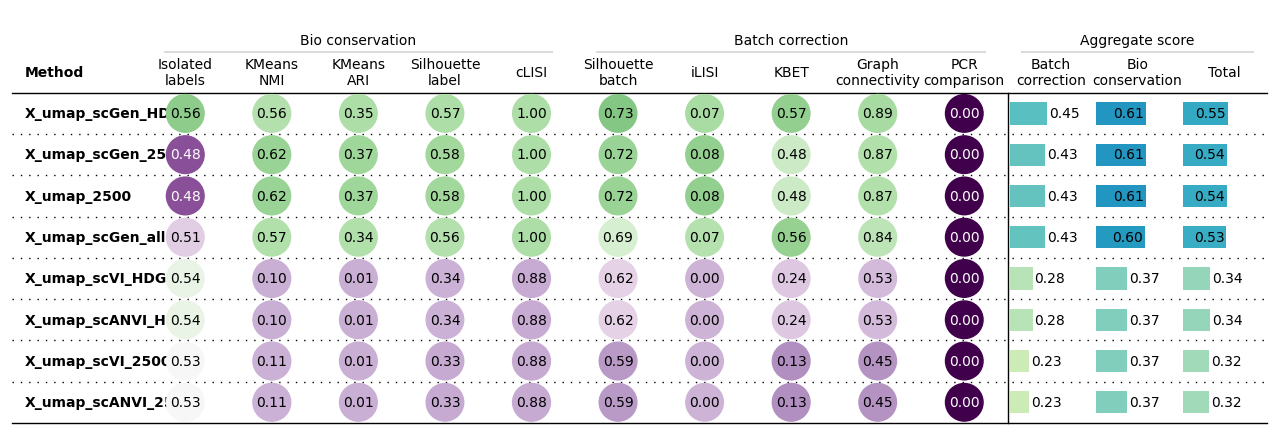

In [ ]:
bm.plot_results_table(min_max_scale=False)

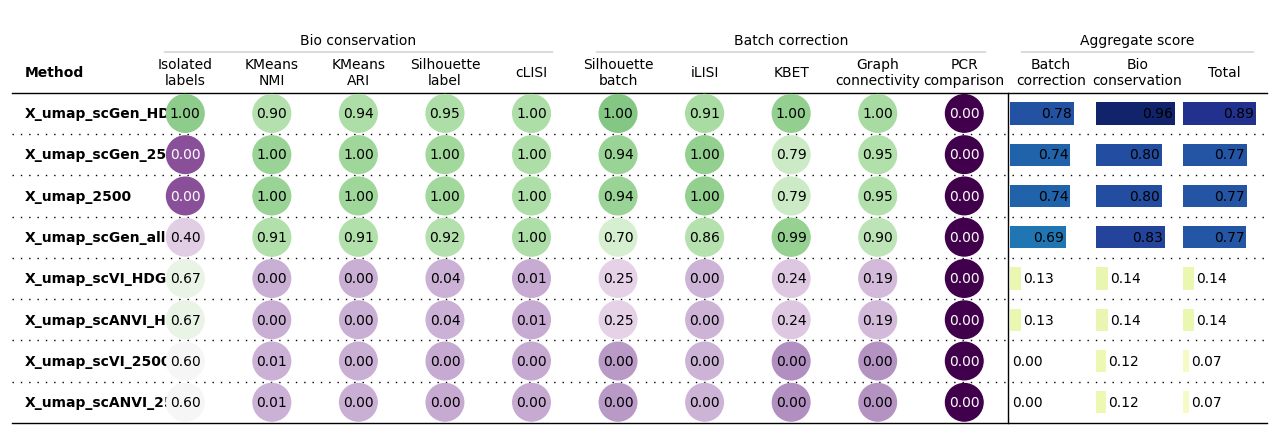

In [ ]:
bm.plot_results_table(min_max_scale=True)

In [ ]:
df = bm.get_results(min_max_scale=False)
print(df)

                     Isolated labels        KMeans NMI        KMeans ARI  \
Embedding                                                                  
X_2500_scANVI               0.484962          0.062596          0.025106   
X_2500_scVI                  0.47226          0.049064          0.019605   
X_umap_2500_scANVI          0.502346          0.039976          0.007191   
X_pca_2500_scANVI           0.555727          0.027691          0.005231   
X_pca_scANVI_HDG            0.667536          0.073353          0.026367   
X_umap_scANVI_HDG           0.530604          0.070534          0.018906   
X_HDG_scANVI                0.446133           0.03924          0.016294   
X_HDG_scVI                  0.444354          0.038282          0.021911   
X_umap_HDG_scANVI           0.506522          0.095662          0.028422   
X_pca_HDG_scANVI            0.667536          0.073353          0.026367   
X_umap_scgen_HDG            0.520616          0.546708          0.368867   
X_pca_scgen_

In [ ]:
adata_first.write_h5ad(initDir + 'seacells_cancer_batch_corr_metrics.h5ad')